In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay)

In [2]:
df = pd.read_csv("corporate_rating.csv")

In [3]:
# Drop less valid categories
df.drop(df.index[df["Rating"].isin(["AAA", "CC", "C", "CCC", "D"])], axis=0, inplace=True)

In [4]:
# Prepare features and target variable
X = df.iloc[:, 6:31].values
y = df.iloc[:, 0].values

In [5]:
# Encode target labels as numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=0)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [9]:
# Recursive Feature Selection with cross-validation
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring="accuracy")
rfecv.fit(X_train, y_train)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=0), scoring='accuracy')

In [10]:
# Reduce features based on RFECV
X_train = X_train[:, rfecv.support_]
X_test = X_test[:, rfecv.support_]

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

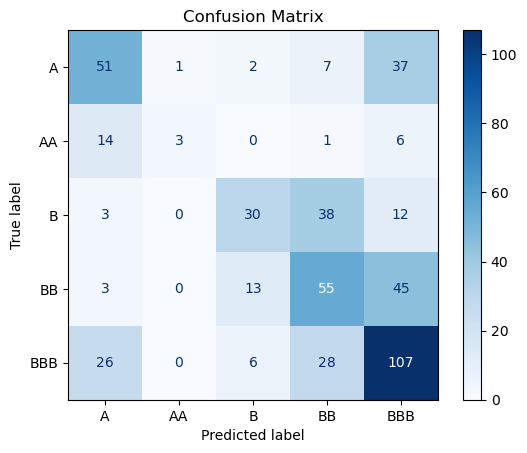

In [12]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


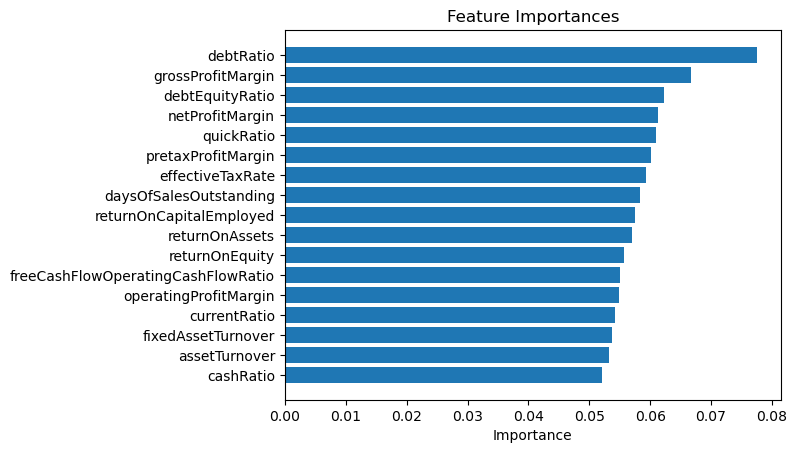

In [13]:
# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [df.columns[i + 6] for i in indices])
plt.xlabel('Importance')
plt.show()


In [14]:
# Print metrics
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

In [15]:
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Precision: 56.14546583403218
Recall: 42.434208806131416
F1-score: 44.125918731964134
Accuracy:  50.409836065573764
